In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})  # enlarge matplotlib fonts

# Import qubit states Zero (|0>) and One (|1>), and Pauli operators (X, Y, Z)
from qiskit.opflow import Zero, One, I, X, Y, Z

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Returns the matrix representation of the XXX Heisenberg model for 3 spin-1/2 particles in a line
def H_heis3():
    # Interactions (I is the identity matrix; X, Y, and Z are Pauli matricies; ^ is a tensor product)
    XXs = (I^X^X) + (X^X^I)
    YYs = (I^Y^Y) + (Y^Y^I)
    ZZs = (I^Z^Z) + (Z^Z^I)
    
    # Sum interactions
    H = XXs + YYs + ZZs
    
    # Return Hamiltonian
    return H

In [26]:
# Returns the matrix representation of U_heis3(t) for a given time t assuming an XXX Heisenberg Hamiltonian for 3 spins-1/2 particles in a line
def U_heis3(t):
    # Compute XXX Hamiltonian for 3 spins in a line
    H = H_heis3()
    
    # Return the exponential of -i multipled by time t multipled by the 3 spin XXX Heisenberg Hamilonian 
    return (t * H).exp_i()


def U_trot3(t, n):
    heis1 = (X^X^I) + (Y^Y^I) + (Z^Z^I)
    heis2 = (I^X^X) + (I^Y^Y) + (I^Z^Z)

    U = (I^I^I) # @ (t * heis1).exp_i() @ (t * heis2).exp_i()
    for i in range(n):
        U = U @ (t/n * heis1).exp_i() @ (t/n * heis2).exp_i()
    return U

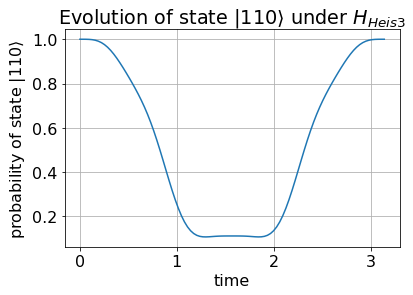

In [42]:
# Define array of time points
ts = np.linspace(0, np.pi, 100)

# Define initial state |110>
initial_state = One^One^Zero

exact_te = [U_heis3(float(t)) @ initial_state for t in ts]
trot_te = [U_trot3(float(t), 1) @ initial_state for t in ts]

# Compute probability of remaining in |110> state over the array of time points
 # ~initial_state gives the bra of the initial state (<110|)
 # @ is short hand for matrix multiplication
 # U_heis3(t) is the unitary time evolution at time t
 # t needs to be wrapped with float(t) to avoid a bug
 # (...).eval() returns the inner product <110|U_heis3(t)|110>
 #  np.abs(...)**2 is the modulus squared of the innner product which is the expectation value, or probability, of remaining in |110>
# probs_110 = [np.abs((~initial_state @ U_heis3(float(t)) @ initial_state).eval())**2 for t in ts]
# probs_110_trot = [np.abs((~initial_state @ U_trot3(float(t), 2) @ initial_state).eval())**2 for t in ts]


fidelity = [np.abs((~exact @ trot).eval())**2 for exact, trot in zip(exact_te, trot_te)]
# Plot evolution of |110>
# plt.plot(ts, probs_110)
# plt.plot(ts, probs_110_trot)
plt.plot(ts, fidelity)

plt.xlabel('time')
plt.ylabel(r'probability of state $|110\rangle$')
plt.title(r'Evolution of state $|110\rangle$ under $H_{Heis3}$')
plt.grid()
plt.show()

In [11]:
(4 * H_heis3()).exp_i() @ (5 * H_heis3()).exp_i()

ComposedOp([EvolvedOp(PauliSumOp(SparsePauliOp(['IXX', 'XXI', 'IYY', 'YYI', 'IZZ', 'ZZI'],
              coeffs=[4.+0.j, 4.+0.j, 4.+0.j, 4.+0.j, 4.+0.j, 4.+0.j]), coeff=1), coeff=1.0), EvolvedOp(PauliSumOp(SparsePauliOp(['IXX', 'XXI', 'IYY', 'YYI', 'IZZ', 'ZZI'],
              coeffs=[5.+0.j, 5.+0.j, 5.+0.j, 5.+0.j, 5.+0.j, 5.+0.j]), coeff=1), coeff=1.0)], coeff=1.0, abelian=False)